In [17]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import os
import re

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("paper", font_scale=1.8)
sns.set_palette("hls", 15) 

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", -1)
pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option("display.max_info_rows", 200)

In [2]:
import data_processing as dp
%load_ext autoreload
%autoreload 2

# Detailed Product Table

In [15]:
json_folder = "/Users/valmadrid/DataScienceBootcamp/Projects/Gift Recommendation/Gift-Recommendation/web_scraping/json/"
os.path.exists(json_folder)

True

In [11]:
downloaded_json = [file for file in os.listdir(json_folder) if file.endswith(".json")]
products_detailed_list = []

for filename in tqdm(downloaded_json):
    file_dict = dp.extract_info(filename, json_folder)
    products_detailed_list.append(file_dict)

df_products = pd.DataFrame(products_detailed_list).sort_values(["brand_id", "product_id"])
df_products.to_csv("products_detailed.csv", index=False)

del products_detailed_list, file_dict, downloaded_json

In [12]:
df_products = pd.read_csv("products_detailed.csv")
df_products

,product_id,name,brand_id,brand_name,short_desc,long_desc,sku,sku_name,list_price,variation,variants,price_low,price_high,rating,review_count,user_favorites,categories,full_url,image_url,ingredients,suggested_usage,brand_long
0,P180726,Pour Homme II,1063,Gucci,"An alluring fragrance heightened by a sensual, spicy soul, Gucci Pour Homme II is the essence of young, masculine sensuality.","An alluring fragrance heightened by a sensual, spicy soul, Gucci Pour Homme II is the essence of young, masculine sensuality. The embodiment of relaxed refinement for the modern-minded man whose style is distinctive and effortless, this fresh, spicy, woody, scent is filled with playful attitude and charisma. Notes: Bergamot, Violet Leaves, Cinnamon, Pimento, Black Tea, Myrrh, Tobacco Leaves, White Musk, Olive Wood. Style: Seductive. Masculine. Free-spirited.",997338,3.3 oz/ 98 mL Eau de Toilette Spray,92.0000,Size + Concentration + Formulation,NaN,92.0000,92.0000,4.8070,114,2030,"{'cat60150': 'Cologne', 'cat1230040': 'Men', 'cat160006': 'Fragrance'}",https://www.sephora.com/product/pour-homme-ii-P180726?skuId=997338,https://www.sephora.com/productimages/sku/s997338-main-Lhero.jpg,"Alcohol Denat., Fragrance, Water, Ethylhexyl Methoxycinnamate, Diethylamino Hydroxybenzoyl Hexyl Benzoate, BHT, Benzyl Salicylate, Linalool, Butylphenyl Methylpropional, Hydroxycitronellal, Limonene, Hexyl Cinnamal, Citronellol, Alpha-Isomethyl Ionone, Geraniol, Hydroxyisohexyl 3-Cyclohexene Carboxaldehyde, Citral, Farnesol, Isoeugenol, Anise Alcohol, Benzyl Benzoate, CI 17200 (Red 33), CI 19140 (Yellow 5), CI 42090 (Blue 1).",NaN,"Redefining Luxury | Influential, innovative, and progressive, Gucci is reinventing a modern approach to fashion. Gucci's eclectic, contemporary, romantic products represent the pinnacle of Italian craftsmanship and are unsurpassed for their quality and attention to detail."
1,P224900,Gucci By Gucci Pour Homme,1063,Gucci,"A signature for the modern Gucci man, Gucci by Gucci Pour Homme combines classic masculine appeal with cool, contemporary elegance.","A new signature for the modern Gucci man, Gucci by Gucci Pour Homme combines classic masculine appeal with cool, contemporary elegance. This iconic fragrance culminates both vision and tradition, encompassing Gucci's iconic, luxurious heritage. With its warm, intense scent, Gucci by Gucci Pour Homme speaks to the powerful, sensual man who embodies the brand's rich legacy. The top and the heart of this essence deliver a smooth, crisp freshness with a touch of cypress and calone. Violet and bergamot create a masculine floralcy for natural and timeless appeal. A unique heart distinguishes the scent and intensifies its character with incense, leather accord, and a subtly sweet note of tobacco. Amber lavishes the aroma with a warm embrace of longevity and depth, while black pepper adds hints of sparkling effect. The base is completed with woody layers of patchouli, cedarwood, and amyris. The sleek horsebit-adorned flacon reflects the undeniably elegant appeal that is quintessentially Gucci. Notes: Bergamot, Cypress, Violet Incense, Jasmine, Tobacco Leaves, Patchouli, Amber. Style: Confident. Masculine. Refined.",1130194,1.7 oz/ 50 mL Eau de Toilette Spray,73.0000,Size + Concentration + Formulation,"[{1: {'item': '1130194', 'item_name': '1.7 oz/ 50 mL Eau de Toilette Spray', 'list_price': 73.0}}, {2: {'item': '1130202', 'item_name': '3 oz/ 90 mL Eau de Toilette Spray', 'list_price': 91.0}}]",73.0000,91.0000,4.7241,145,2246,"{'cat60150': 'Cologne', 'cat1230040': 'Men', 'cat160006': 'Fragrance'}",https://www.sephora.com/product/gucci-by-gucci-pour-homme-P224900?skuId=1130194,https://www.sephora.com/productimages/sku/s1130194-main-Lhero.jpg,"Alcohol Denat., Fragrance, Water, Ethylhexyl Methoxycinnamate, Diethylamino Hydroxybenzoyl Hexyl Benzoate, BHT, Benzyl Salicylate, Linalool, Butylphenyl Methylpropional, Hydroxycitronellal, Limonene, Hexyl Cinnamal, Citronellol, Alpha-Isomethyl Ionone, Geraniol, H

In [13]:
df_products.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 22 columns):
product_id         8993 non-null object
name               8993 non-null object
brand_id           8993 non-null int64
brand_name         8993 non-null object
short_desc         8983 non-null object
long_desc          8983 non-null object
sku                8993 non-null int64
sku_name           7685 non-null object
list_price         8993 non-null float64
variation          8993 non-null object
variants           3929 non-null object
price_low          8993 non-null float64
price_high         8993 non-null float64
rating             8779 non-null float64
review_count       8993 non-null int64
user_favorites     8993 non-null int64
categories         8986 non-null object
full_url           8993 non-null object
image_url          8993 non-null object
ingredients        7440 non-null object
suggested_usage    7554 non-null object
brand_long         7957 non-null object
dtypes: float

In [14]:
df_products.describe()

,brand_id,sku,list_price,price_low,price_high,rating,review_count,user_favorites
count,8993.0000,8993.0000,8993.0000,8993.0000,8993.0000,8779.0000,8993.0000,8993.0000
mean,5176.5947,1972680.9169,49.5964,45.2365,52.7702,4.1431,332.4278,17748.8931
std,1759.3499,391120.3056,46.7004,43.4546,57.4112,0.5316,995.3585,44602.3072
min,1063.0000,50.0000,2.0000,2.0000,2.0000,1.0000,0.0000,0.0000
25%,4028.0000,1824739.0000,24.0000,22.0000,25.0000,3.8945,13.0000,1968.0000
50%,5972.0000,2081966.0000,34.0000,32.0000,35.0000,4.2262,53.0000,5454.0000
75%,6218.0000,2249720.0000,58.0000,52.5000,60.0000,4.4913,235.0000,15427.0000
max,8018.0000,2379352.0000,549.0000,499.0000,860.0000,5.0000,19507.0000,1268248.0000


# Product Stats

In [6]:
reviews_folder = "/Users/valmadrid/DataScienceBootcamp/Projects/Gift Recommendation/Gift-Recommendation/web_scraping/reviews/"
os.path.exists(reviews_folder)

True

In [22]:
downloaded_stats = [
    file for file in os.listdir(reviews_folder) if file.endswith("stats.json")
    and file.strip("_stats.json") in df_products.product_id.unique()
]

In [23]:
len(downloaded_stats)

8993

In [207]:
df_stats = pd.DataFrame()
no_stats = []
all_stats = []

for filename in tqdm(downloaded_stats):
    stats = dp.extract_stats(filename, reviews_folder)
    if len(stats) == 0:
        no_stats.append(filename)
    else:
        all_stats.extend(stats)

df_stats = pd.DataFrame(all_stats)
df_stats.to_csv("product_stats.csv", index=False)

In [208]:
# df_stats = pd.read_csv("product_stats.csv")
df_stats.head()

,product_id,FeaturedReviewCount,RecommendedCount,SecondaryRatingsAveragesOrder,AverageOverallRating,NotHelpfulVoteCount,RatingDistribution,RatingsOnlyReviewCount,FirstSubmissionTime,TagDistribution,ContextDataDistribution,TotalReviewCount,LastSubmissionTime,TagDistributionOrder,OverallRatingRange,NotRecommendedCount,HelpfulVoteCount,SecondaryRatingsAverages,ContextDataDistributionOrder
0,P163103,0,375,[],4.5587,955,"[{'RatingValue': 1, 'Count': 42}, {'RatingValue': 2, 'Count': 52}, {'RatingValue': 3, 'Count': 101}, {'RatingValue': 4, 'Count': 294}, {'RatingValue': 5, 'Count': 1369}]",5,2008-08-31T14:02:50.000+00:00,"{'Pro': {'Label': 'Pros', 'Values': [{'Value': 'good value', 'Count': 162}, {'Value': 'travel-friendly', 'Count': 104}, {'Value': 'sexy', 'Count': 52}, {'Value': 'floral', 'Count': 45}, {'Value': 'fresh', 'Count': 43}, {'Value': 'feminine', 'Count': 37}, {'Value': 'light', 'Count': 35}, {'Value': 'clean', 'Count': 28}, {'Value': 'sweet', 'Count': 22}, {'Value': 'reusable', 'Count': 20}, {'Value': 'long lasting', 'Count': 17}, {'Value': 'bright', 'Count': 13}, {'Value': 'fruity', 'Count': 12}, {'Value': 'beautiful', 'Count': 11}, {'Value': 'amazing', 'Count': 10}, {'Value': 'flirty', 'Count': 10}, {'Value': 'lovely', 'Count': 9}, {'Value': 'soft', 'Count': 9}, {'Value': 'flowery', 'Count': 7}, {'Value': 'fun', 'Count': 7}, {'Value': 'sensual', 'Count': 7}, {'Value': 'classy', 'Count': 6}, {'Value': 'pretty', 'Count': 6}, {'Value': 'refreshing', 'Count': 6}, {'Value': 'elegant', 'Count': 5}, {'Value': 'fabulous', 'Count': 5}, {'Value': 'long-lasting', 'Count': 5}, {'Value': 'romantic', 'Count': 5}, {'Value': 'sophisticated', 'Count': 5}, {'Value': 'young', 'Count': 5}], 'Id': 'Pro'}}","{'skinType': {'Label': 'Skin Type', 'Values': [{'Value': 'normal', 'Count': 53}, {'Value': 'combination', 'Count': 215}, {'Value': 'dry', 'Count': 65}, {'Value': 'oily', 'Count': 50}], 'Id': 'skinType'}, 'eyeColor': {'Label': 'Eye Color', 'Values': [{'Value': 'blue', 'Count': 75}, {'Value': 'brown', 'Count': 211}, {'Value': 'green', 'Count': 44}, {'Value': 'hazel', 'Count': 45}, {'Value': 'gray', 'Count': 2}], 'Id': 'eyeColor'}, 'StaffContext': {'Label': 'I am a Sephora employee', 'Values': [{'Value': 'true', 'Count': 1}, {'Value': 'false', 'Count': 523}], 'Id': 'StaffContext'}, 'hairColor': {'Label': 'Hair color', 'Values': [{'Value': 'blonde', 'Count': 69}, {'Value': 'brunette', 'Count': 188}, {'Value': 'auburn', 'Count': 17}, {'Value': 'black', 'Count': 94}, {'Value': 'red', 'Count': 11}, {'Value': 'gray', 'Count': 4}], 'Id': 'hairColor'}, 'skinTone': {'Label': 'Skin Tone', 'Values': [{'Value': 'fair', 'Count': 71}, {'Value': 'light', 'Count': 120}, {'Value': 'medium', 'Count': 82}, {'Value': 'olive', 'Count': 22}, {'Value': 'deep', 'Count': 18}, {'Value': 'dark', 'Count': 16}, {'Value': 'porcelain', 'Count': 22}, {'Value': 'tan', 'Count': 28}, {'Value': 'ebony', 'Count': 6}], 'Id': 'skinTone'}, 'IncentivizedReview': {'Label': 'I received this product as a free sample', 'Values': [{'Value': 'true', 'Count': 64}, {'Value': 'false', 'Count': 460}], 'Id': 'IncentivizedReview'}, 'age': {'Label': 'Age', 'Values': [{'Value': '13to17', 'Count': 41}, {'Value': '18to24', 'Count': 368}, {'Value': '25to34', 'Count': 396}, {'Value': '35to44', 'Count': 141}, {'Value': '45to54', 'Count': 94}, {'Value': 'over54', 'Count': 44}], 'Id': 'age'}}",1858,2020-06-23T22:39:46.000+00:00,[Pro],5,34,2466,{},"[eyeColor, hairColor, skinTone, skinType, age, IncentivizedReview, StaffContext]"
1,P12045,0,590,[],4.4369,660,"[{'RatingValue': 1, 'Count': 46}, {'RatingValue': 2, 'Count': 46}, {'RatingValue': 3, 'Count': 88}, {'RatingValue': 4, 'Count': 261}, {'RatingValue': 5, 'Count': 907}]",3,2008-09-11T18:28:13.000+00:00,"{'Pro': {'Label': 'Pros', 'Values': [{'Value': 'refreshing', 'Count': 231}, {'Value': 'non-drying', 'Count': 98}, {'Value': 'hydrating', 'Count': 51}, {'Value': 'soothing', 'Count': 25}, {'Value': 'moisturizing', 'Count': 16}, {'Value': 'cooling',

In [209]:
for i in tqdm(range(len(df_stats))):

    if df_stats["TagDistribution"].iloc[i] != {}:
        df_stats.at[i, "tags"] = str(
            dict(
                zip([
                    i["Value"]
                    for i in df_stats["TagDistribution"].iloc[i]["Pro"]["Values"]
                ], [
                    i["Count"]
                    for i in df_stats["TagDistribution"].iloc[i]["Pro"]["Values"]
                ])))

    if df_stats["RatingDistribution"].iloc[i] != []:
        for rating in df_stats["RatingDistribution"].iloc[i]:
            col_name = "rating_" + str(rating["RatingValue"])
            df_stats.at[i, col_name] = rating["Count"]

    if df_stats["ContextDataDistribution"].iloc[i] != {}:
        for context, value in df_stats["ContextDataDistribution"].iloc[i].items():
            for context2, value2 in value.items():
                if context2 == "Values":
                    for value3 in value2:
                        col_name = context.lower(
                        ) + "_" + value3["Value"].lower()
                        df_stats.at[i, col_name] = value3["Count"]

In [210]:
columns_to_delete = [
    "SecondaryRatingsAveragesOrder", "SecondaryRatingsAverages",
    "RatingDistribution", "ContextDataDistribution", "TagDistribution",
    "TagDistributionOrder", "OverallRatingRange",
    "ContextDataDistributionOrder", "FeaturedReviewCount",
    "NotHelpfulVoteCount", "HelpfulVoteCount", "FirstSubmissionTime",
    "LastSubmissionTime"
]

df_stats.drop(columns=columns_to_delete, inplace=True)

In [211]:
df_stats.head()

,product_id,RecommendedCount,AverageOverallRating,RatingsOnlyReviewCount,TotalReviewCount,NotRecommendedCount,tags,rating_1,rating_2,rating_3,rating_4,rating_5,skintype_normal,skintype_combination,skintype_dry,skintype_oily,eyecolor_blue,eyecolor_brown,eyecolor_green,eyecolor_hazel,eyecolor_gray,staffcontext_true,staffcontext_false,haircolor_blonde,haircolor_brunette,haircolor_auburn,haircolor_black,haircolor_red,haircolor_gray,skintone_fair,skintone_light,skintone_medium,skintone_olive,skintone_deep,skintone_dark,skintone_porcelain,skintone_tan,skintone_ebony,incentivizedreview_true,incentivizedreview_false,age_13to17,age_18to24,age_25to34,age_35to44,age_45to54,age_over54,skinconcerns_acne,skinconcerns_aging,skinconcerns_blackheads,skinconcerns_calluses,skinconcerns_cellulite,skinconcerns_cuticles,skinconcerns_darkcircles,skinconcerns_dullness,skinconcerns_pores,skinconcerns_redness,skinconcerns_sensitivity,skinconcerns_stretchmarks,skinconcerns_sundamage,skinconcerns_unevenskintones,hairconcerns_antiaging,hairconcerns_colorprotection,hairconcerns_curlyenhancing,hairconcerns_damage,hairconcerns_dandruff,hairconcerns_frizz,hairconcerns_heatprotection,hairconcerns_hold,hairconcerns_oiliness,hairconcerns_shine,hairconcerns_straighteningsmoothing,hairconcerns_volumizing,haircondition_normal,haircondition_oily,haircondition_dry,haircondition_fine,haircondition_coarse,haircondition_curly,haircondition_chemicallytreated,haircondition_straight,hairconcerns_thinning,haircondition_wavy,skinconcerns_puffiness
0,P163103,375,4.5587,5,1858,34,"{'good value': 162, 'travel-friendly': 104, 'sexy': 52, 'floral': 45, 'fresh': 43, 'feminine': 37, 'light': 35, 'clean': 28, 'sweet': 22, 'reusable': 20, 'long lasting': 17, 'bright': 13, 'fruity': 12, 'beautiful': 11, 'amazing': 10, 'flirty': 10, 'lovely': 9, 'soft': 9, 'flowery': 7, 'fun': 7, 'sensual': 7, 'classy': 6, 'pretty': 6, 'refreshing': 6, 'elegant': 5, 'fabulous': 5, 'long-lasting': 5, 'romantic': 5, 'sophisticated': 5, 'young': 5}",42.0000,52.0000,101.0000,294.0000,1369.0000,53.0000,215.0000,65.0000,50.0000,75.0000,211.0000,44.0000,45.0000,2.0000,1.0000,523.0000,69.0000,188.0000,17.0000,94.0000,11.0000,4.0000,71.0000,120.0000,82.0000,22.0000,18.0000,16.0000,22.0000,28.0000,6.0000,64.0000,460.0000,41.0000,368.0000,396.0000,141.0000,94.0000,44.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,P12045,590,4.4369,3,1348,85,"{'refreshing': 231, 'non-drying': 98, 'hydrating': 51, 'soothing': 25, 'moisturizing': 16, 'cooling': 12, 'natural': 5, 'acne treating': 4, 'light': 4, 'revitalizing': 4, 'calming': 3, 'gentle': 3, 'relaxing': 3, 'awesome': 2, 'brightening': 2, 'effective': 2, 'fresh': 2, 'great': 2, 'overpriced': 2, 'smells good': 2, 'smells nice': 2, 'smoothing': 2, 'softening': 2, 'toning': 2, 'versatile': 2, ""'perks up' skin tone"": 1, 'a nice luxury': 1, 'a wonder product': 1, 'absorbs quickly': 1, 'acalming': 1}",46.0000,46.0000,88.0000,261.0000,907.0000,79.0000,476.0000,176.0000,86.0000,115.0000,370.0000,66.0000,75.0000,4.0000,8.0000,548.0000,112.0000,304.0000,16.0000,182.0000,21.0000,6.0000,207.0000,215.0000,157.0000,56.0000,28.0000,14.0000,48.0000,57.0000,2.0000,3.0000,553.0000,4.0000,59.0000,109.0000,54.0000,26.0000,24.0000,297.0000,123.0000,44.0000,1.0000,4.0000,4.0000,41.0000,21.0000,2.0000,23.0000,25.0000,1.0000,5.0000,4.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,P386462,111,4.1207,1,348,34,"{""doesn't weigh hair down"": 85, 'rich': 64, 'strengthening': 36, 'smells great': 7, 'smoothing': 5, 'hydrating': 3, 'moisturizing': 3, 'bad texture': 2, 'smells amazing': 2, 'smooth': 2, 'soft': 2, 'softening': 2, 'a little goes a long way': 1, 'adds shine and body': 1, 'adds tons of shine': 1, 'anti frizz': 1, 'awesome!': 1, 'bad strong odour': 1, 'clarifying': 1, 'creamy': 1, 'daily conditioner': 1, 'delightful scent': 1, 'det

In [213]:
df_stats.rename(
    {
        "AverageOverallRating": "average_rating",
        "TotalReviewCount": "review_count",
        "RecommendedCount": "recommended",
        "NotRecommendedCount": "not_recommended",
        "RatingsOnlyReviewCount": "ratings_only"
    },
    axis=1,
    inplace=True)

df_stats.fillna(0, inplace=True)

cols = [
    "rating_1", "rating_2", "rating_3", "rating_4", "rating_5",
    "skintype_normal", "skintype_combination", "skintype_dry", "skintype_oily",
    "eyecolor_blue", "eyecolor_brown", "eyecolor_green", "eyecolor_hazel",
    "eyecolor_gray", "staffcontext_true", "staffcontext_false",
    "haircolor_blonde", "haircolor_brunette", "haircolor_auburn",
    "haircolor_black", "haircolor_red", "haircolor_gray", "skintone_fair",
    "skintone_light", "skintone_medium", "skintone_olive", "skintone_deep",
    "skintone_dark", "skintone_porcelain", "skintone_tan", "skintone_ebony",
    "incentivizedreview_true", "incentivizedreview_false", "age_13to17",
    "age_18to24", "age_25to34", "age_35to44", "age_45to54", "age_over54",
    "skinconcerns_acne", "skinconcerns_aging", "skinconcerns_blackheads",
    "skinconcerns_calluses", "skinconcerns_cellulite", "skinconcerns_cuticles",
    "skinconcerns_darkcircles", "skinconcerns_dullness", "skinconcerns_pores",
    "skinconcerns_redness", "skinconcerns_sensitivity",
    "skinconcerns_stretchmarks", "skinconcerns_sundamage",
    "skinconcerns_unevenskintones", "hairconcerns_antiaging",
    "hairconcerns_colorprotection", "hairconcerns_curlyenhancing",
    "hairconcerns_damage", "hairconcerns_dandruff", "hairconcerns_frizz",
    "hairconcerns_heatprotection", "hairconcerns_hold",
    "hairconcerns_oiliness", "hairconcerns_shine",
    "hairconcerns_straighteningsmoothing", "hairconcerns_volumizing",
    "haircondition_normal", "haircondition_oily", "haircondition_dry",
    "haircondition_fine", "haircondition_coarse", "haircondition_curly",
    "haircondition_chemicallytreated", "haircondition_straight",
    "hairconcerns_thinning", "haircondition_wavy", "skinconcerns_puffiness"
]

for col in cols:
    df_stats[col] = df_stats[col].astype("int64", errors="ignore")

df_stats = df_stats[[
    "product_id", "review_count", "average_rating", "recommended", "not_recommended",
    "ratings_only", "tags"
] + cols].copy()

df_stats.head()

,product_id,review_count,average_rating,recommended,not_recommended,ratings_only,tags,rating_1,rating_2,rating_3,rating_4,rating_5,skintype_normal,skintype_combination,skintype_dry,skintype_oily,eyecolor_blue,eyecolor_brown,eyecolor_green,eyecolor_hazel,eyecolor_gray,staffcontext_true,staffcontext_false,haircolor_blonde,haircolor_brunette,haircolor_auburn,haircolor_black,haircolor_red,haircolor_gray,skintone_fair,skintone_light,skintone_medium,skintone_olive,skintone_deep,skintone_dark,skintone_porcelain,skintone_tan,skintone_ebony,incentivizedreview_true,incentivizedreview_false,age_13to17,age_18to24,age_25to34,age_35to44,age_45to54,age_over54,skinconcerns_acne,skinconcerns_aging,skinconcerns_blackheads,skinconcerns_calluses,skinconcerns_cellulite,skinconcerns_cuticles,skinconcerns_darkcircles,skinconcerns_dullness,skinconcerns_pores,skinconcerns_redness,skinconcerns_sensitivity,skinconcerns_stretchmarks,skinconcerns_sundamage,skinconcerns_unevenskintones,hairconcerns_antiaging,hairconcerns_colorprotection,hairconcerns_curlyenhancing,hairconcerns_damage,hairconcerns_dandruff,hairconcerns_frizz,hairconcerns_heatprotection,hairconcerns_hold,hairconcerns_oiliness,hairconcerns_shine,hairconcerns_straighteningsmoothing,hairconcerns_volumizing,haircondition_normal,haircondition_oily,haircondition_dry,haircondition_fine,haircondition_coarse,haircondition_curly,haircondition_chemicallytreated,haircondition_straight,hairconcerns_thinning,haircondition_wavy,skinconcerns_puffiness
0,P163103,1858,4.5587,375,34,5,"{'good value': 162, 'travel-friendly': 104, 'sexy': 52, 'floral': 45, 'fresh': 43, 'feminine': 37, 'light': 35, 'clean': 28, 'sweet': 22, 'reusable': 20, 'long lasting': 17, 'bright': 13, 'fruity': 12, 'beautiful': 11, 'amazing': 10, 'flirty': 10, 'lovely': 9, 'soft': 9, 'flowery': 7, 'fun': 7, 'sensual': 7, 'classy': 6, 'pretty': 6, 'refreshing': 6, 'elegant': 5, 'fabulous': 5, 'long-lasting': 5, 'romantic': 5, 'sophisticated': 5, 'young': 5}",42,52,101,294,1369,53,215,65,50,75,211,44,45,2,1,523,69,188,17,94,11,4,71,120,82,22,18,16,22,28,6,64,460,41,368,396,141,94,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,P12045,1348,4.4369,590,85,3,"{'refreshing': 231, 'non-drying': 98, 'hydrating': 51, 'soothing': 25, 'moisturizing': 16, 'cooling': 12, 'natural': 5, 'acne treating': 4, 'light': 4, 'revitalizing': 4, 'calming': 3, 'gentle': 3, 'relaxing': 3, 'awesome': 2, 'brightening': 2, 'effective': 2, 'fresh': 2, 'great': 2, 'overpriced': 2, 'smells good': 2, 'smells nice': 2, 'smoothing': 2, 'softening': 2, 'toning': 2, 'versatile': 2, ""'perks up' skin tone"": 1, 'a nice luxury': 1, 'a wonder product': 1, 'absorbs quickly': 1, 'acalming': 1}",46,46,88,261,907,79,476,176,86,115,370,66,75,4,8,548,112,304,16,182,21,6,207,215,157,56,28,14,48,57,2,3,553,4,59,109,54,26,24,297,123,44,1,4,4,41,21,2,23,25,1,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,P386462,348,4.1207,111,34,1,"{""doesn't weigh hair down"": 85, 'rich': 64, 'strengthening': 36, 'smells great': 7, 'smoothing': 5, 'hydrating': 3, 'moisturizing': 3, 'bad texture': 2, 'smells amazing': 2, 'smooth': 2, 'soft': 2, 'softening': 2, 'a little goes a long way': 1, 'adds shine and body': 1, 'adds tons of shine': 1, 'anti frizz': 1, 'awesome!': 1, 'bad strong odour': 1, 'clarifying': 1, 'creamy': 1, 'daily conditioner': 1, 'delightful scent': 1, 'detangles well': 1, 'detangling': 1, 'does not make hair greasy': 1, 'drying': 1, 'easy to wash off': 1, 'emolient': 1, 'flattens curls': 1, 'glossy': 1}",30,25,28,55,210,18,76,28,11,29,51,27,20,3,1,179,37,67,9,16,3,4,41,31,34,4,3,2,11,7,0,17,163,2,19,55,28,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,25,7,35,7,18,3,1,1,3,1,3,18,4,13,26,9,17,34,1,0,0,0
3,P425604,46,4.1957,35,11,1,0,2,3,4,12,25,4,26,8,8,5,25,7,7,1,0,18,12,22,4,7,1,0,14,15,5,2,1,0,4,5,0,0,18,1,1,1,3,2,4,10,7,3,0,0,0,3,1,0,1,0,0,0,1,2,6,2,0,2,5,1,0,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0
4,P398009,2748,3.9913,1053,220,12,"{'lightweight': 414, 'non-drying': 24

In [214]:
df_stats.to_csv("product_stats_cleaned.csv", index=False)

In [3]:
df_stats = pd.read_csv("product_stats_cleaned.csv")

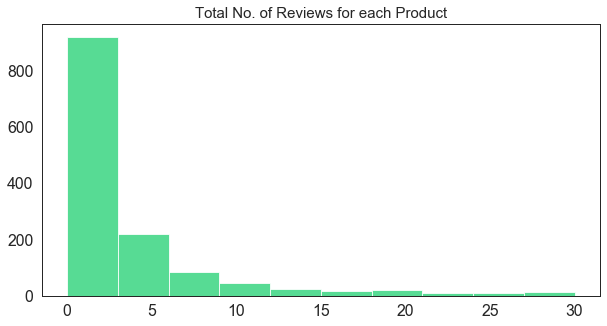

In [37]:
plt.figure(figsize=(10, 5))
df_stats.groupby("review_count").count().product_id.hist(bins = 10, range=(0,30), color="C6")
plt.title("Total No. of Reviews for each Product", fontsize=15)

plt.grid(False)
plt.show()

In [4]:
products_to_consider = df_stats[df_stats.average_rating>3.0].product_id.unique()
len(products_to_consider)

8408

# Product Reviews

In [47]:
downloaded_reviews = [
    file for file in os.listdir(reviews_folder)
    if file.endswith(".json") and not file.endswith("stats.json")
    and file.split("_")[0] in products_to_consider
]

len(downloaded_reviews)

17330

In [50]:
# reviews = []
total_reviews = 0

for file in tqdm(downloaded_reviews):
    with open(reviews_folder + file) as json_file:
        reviews_data = json.load(json_file)

    for review in reviews_data["Results"]:
        if (review["Helpfulness"] == None or review["Helpfulness"] > 0.5
            ) and reviews_data["TotalResults"] >= 5 and "age" in review[
                "ContextDataValues"]:
            #             reviews.append(review)
            total_reviews += 1

# df_reviews = pd.DataFrame(reviews)

total_reviews

121429